In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import sweetviz
from sklearn.ensemble import RandomForestClassifier
% matpllotlib inline

UsageError: Line magic function `%` not found.


### Problem Statement
Using the passenger information of the Titanic, we need to predict who will survive and who will die.

In [19]:
titanic_passengers = pd.read_csv('train.csv') # reading the data file
titanic_passengers_test = pd.read_csv('test.csv')
titanic_passengers.head() # checking the first 5 rows from the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Column details in the dataset

    PassengerId - Passenger Identification
    Survived - Survival
    Pclass - Ticket class
    Name - Passenger name
    Sex - Sex/Gender
    Age - Age in years
    SibSp - No. of siblings / spouses aboard the Titanic
    Parch - No. of parents / children aboard the Titanic
    Ticket - Ticket number
    Fare - Passenger fare
    Cabin - Cabin number
    Embarked - Port of Embarkation

### What are the features?

    Pclass
    Sex
    SibSp
    Parch

### What is the response ?

Survived - Determine whether each passenger survived or not

In [4]:
titanic_passengers.shape

(891, 12)

In [5]:
titanic_passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_passengers.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
my_report = sweetviz.analyze([titanic_passengers, "Titanic_Passengers"], "Survived")


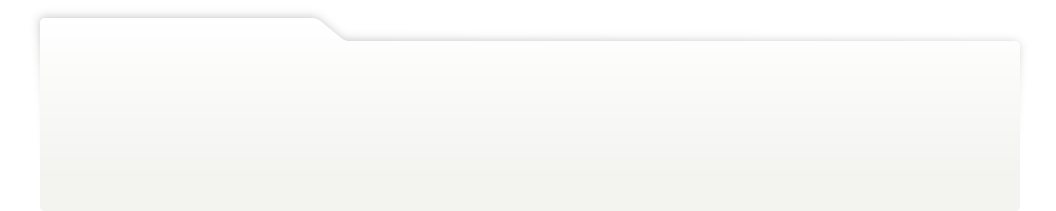
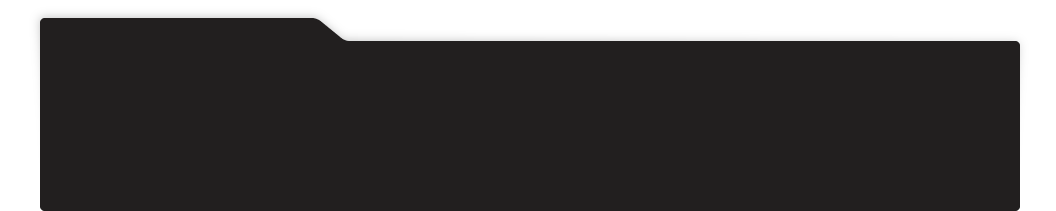
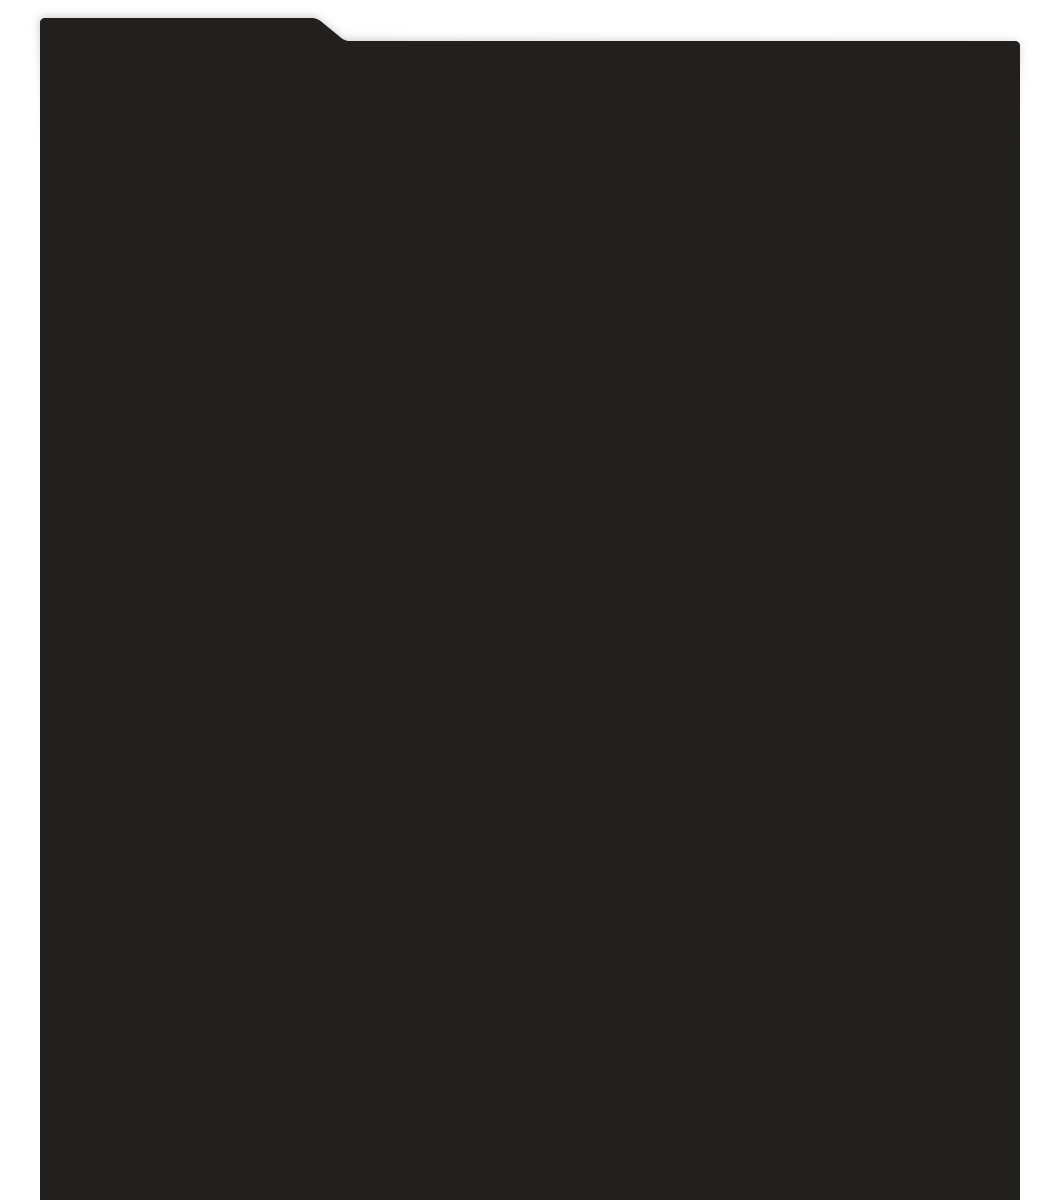
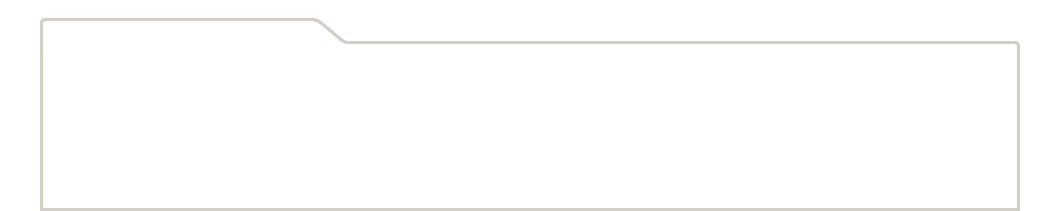
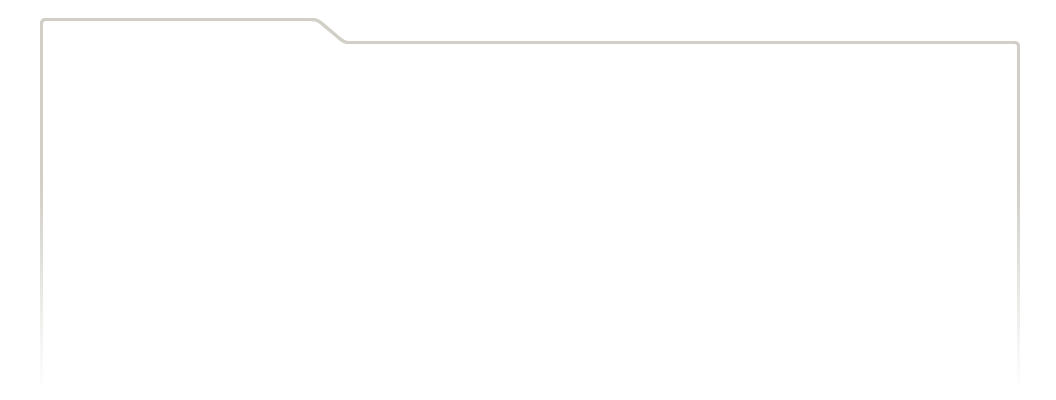
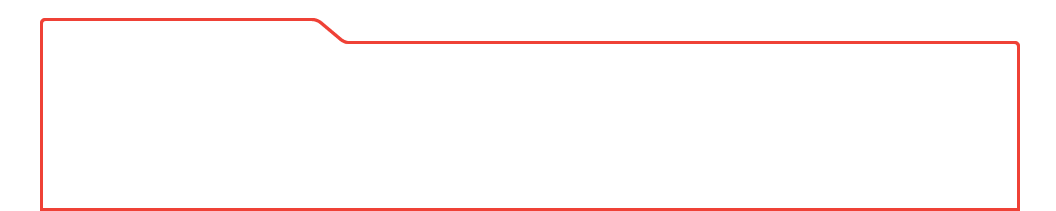
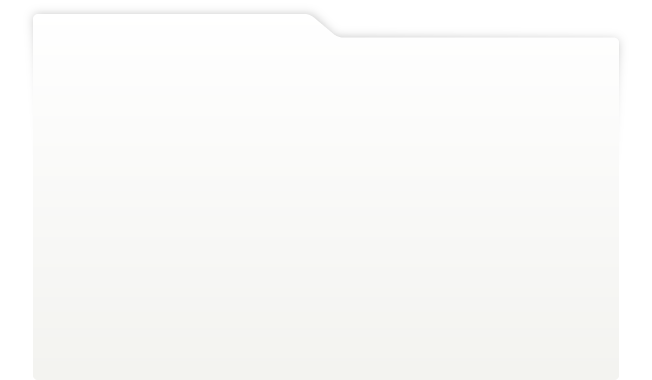
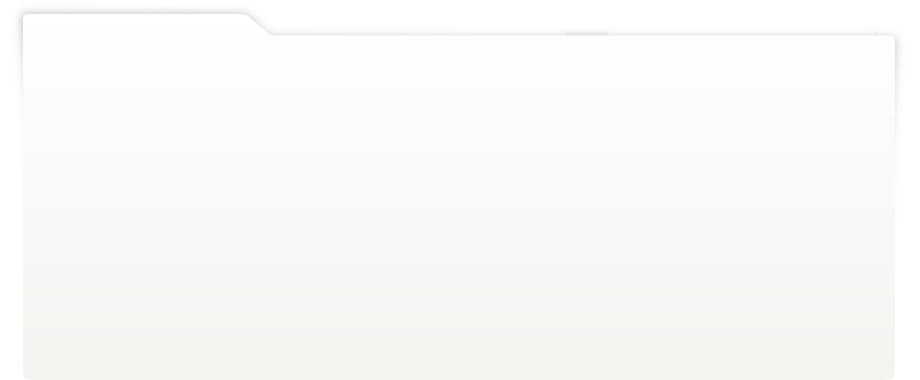
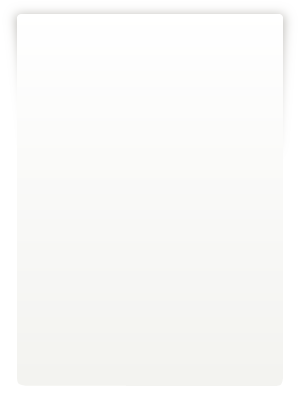
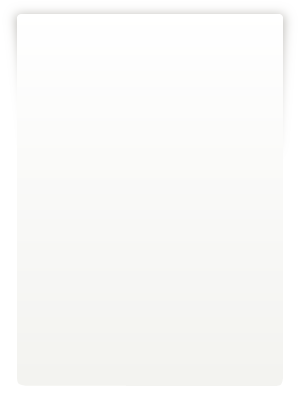
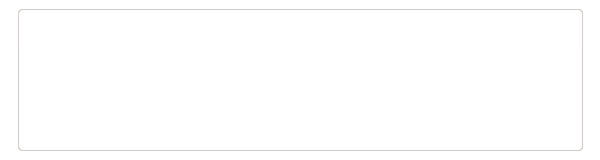
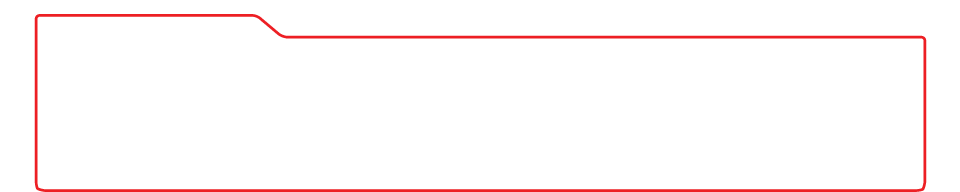
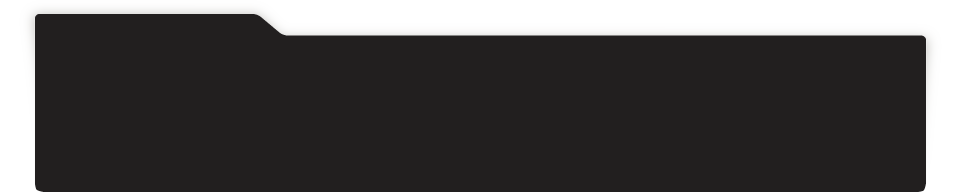
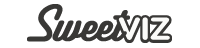
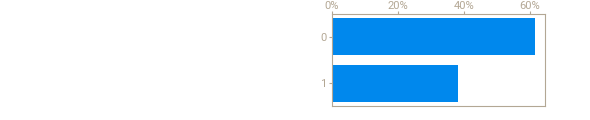
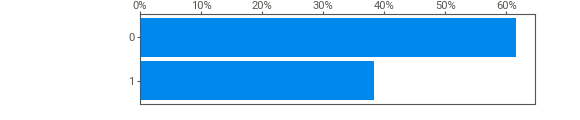
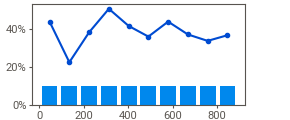
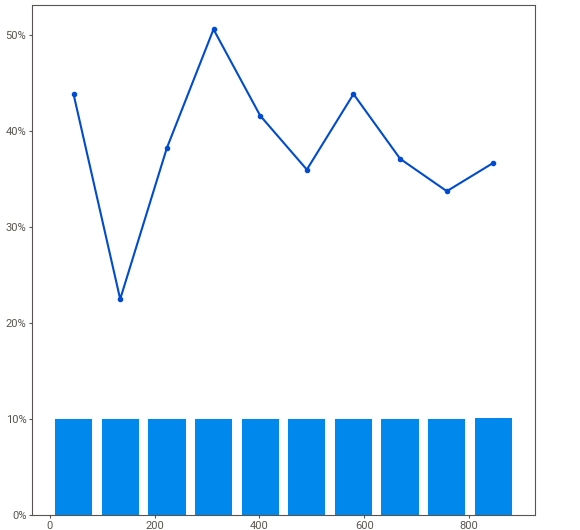
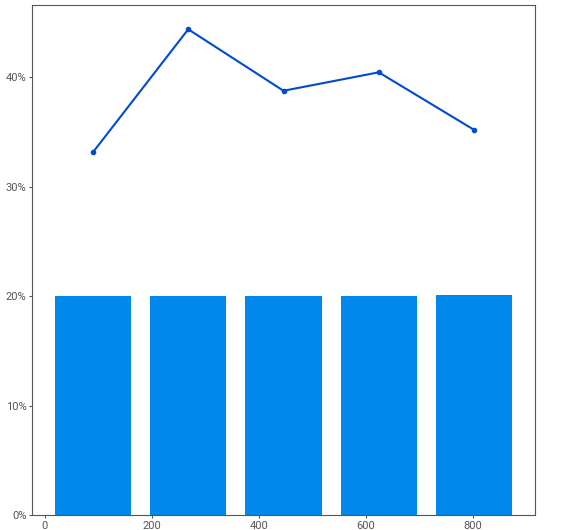
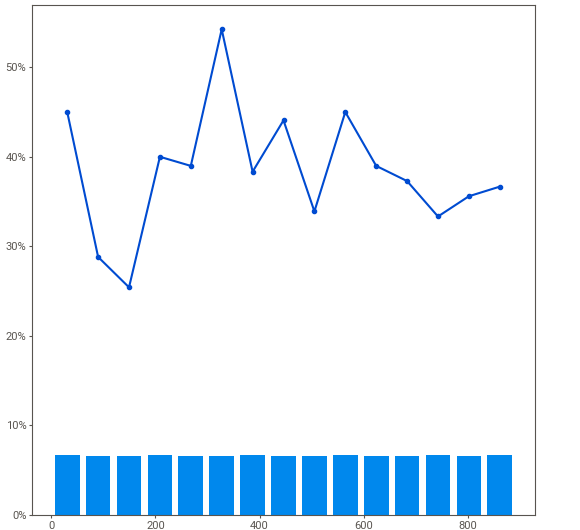
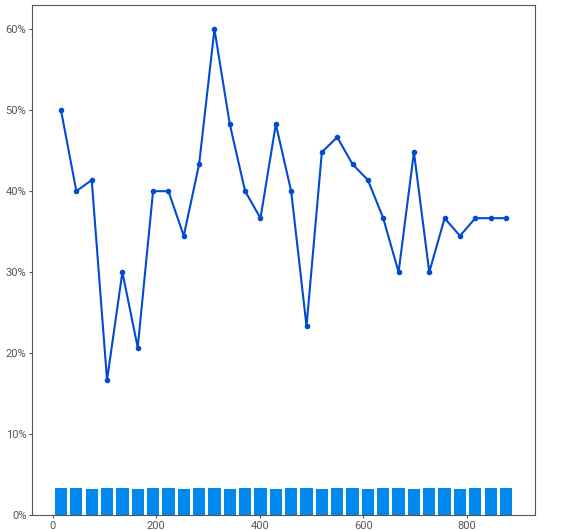
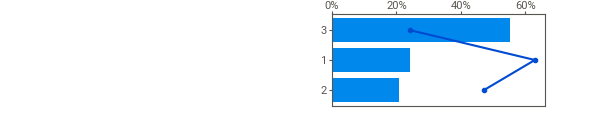
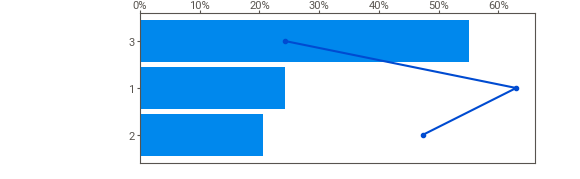
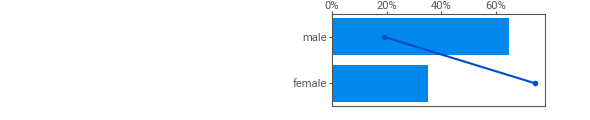
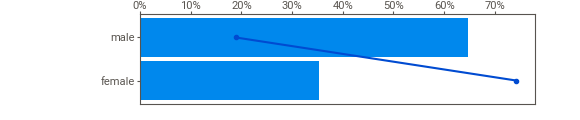
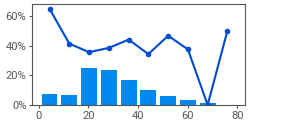
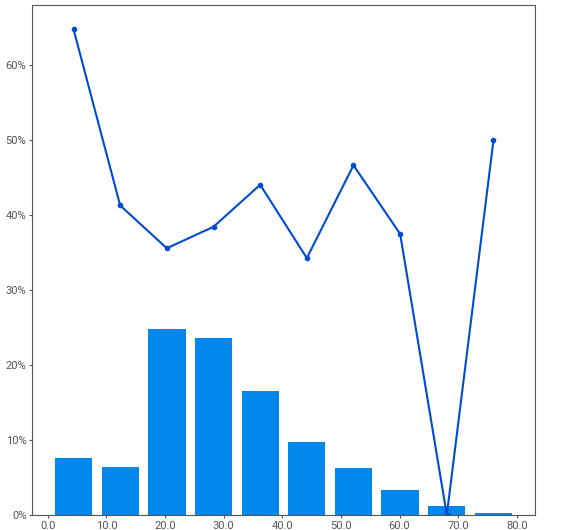
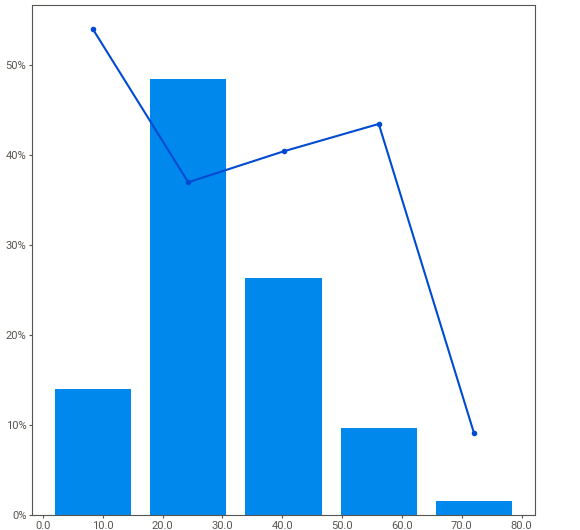
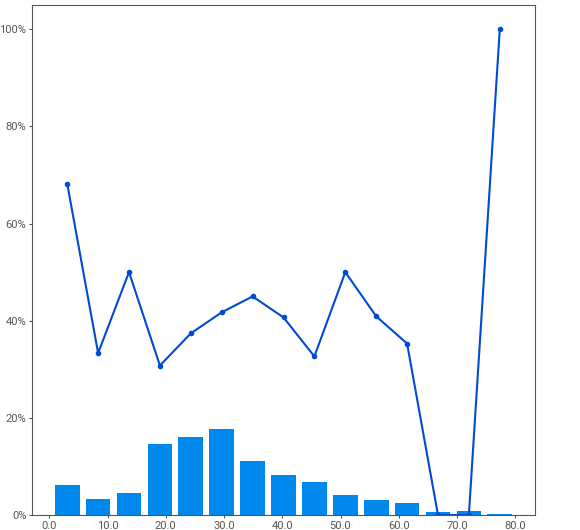
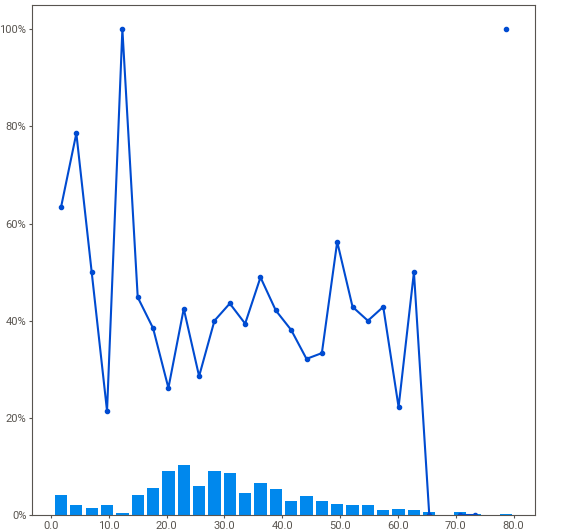
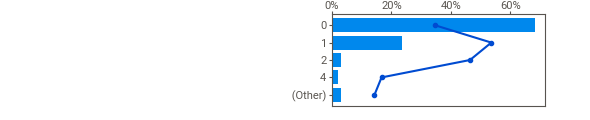
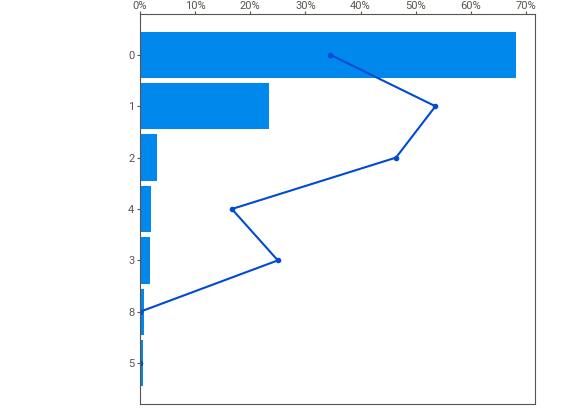
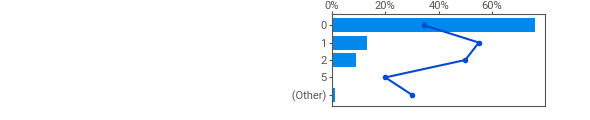
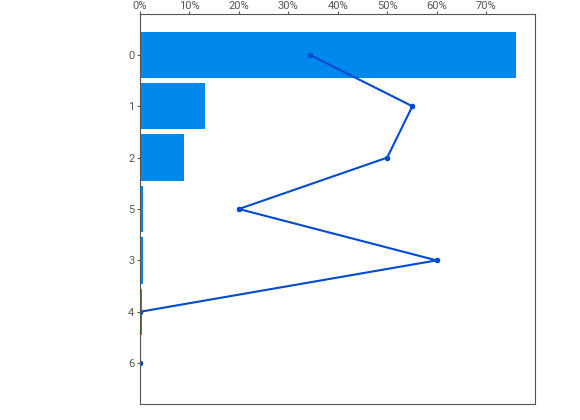
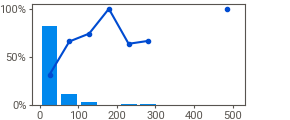
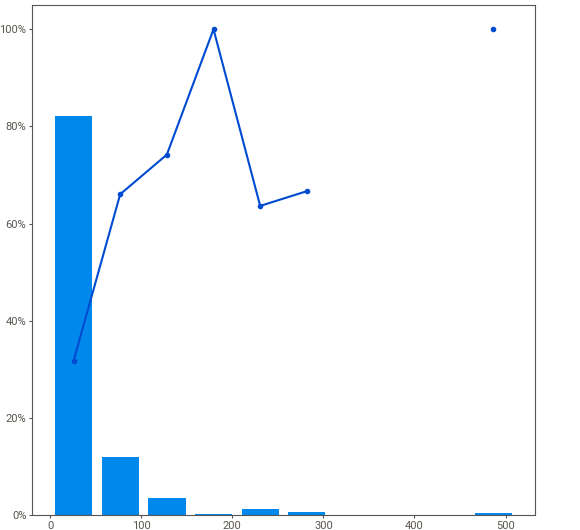
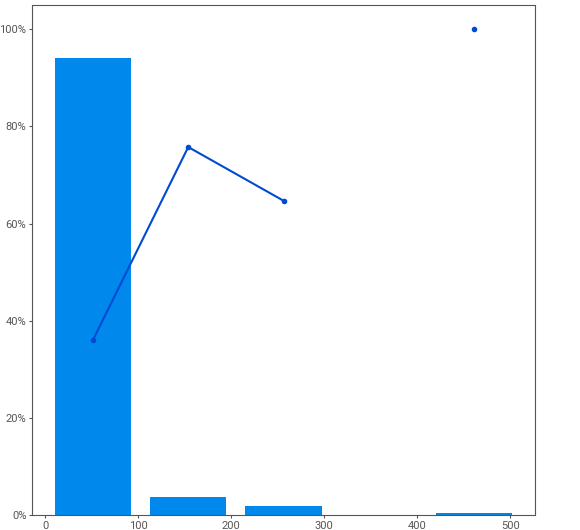
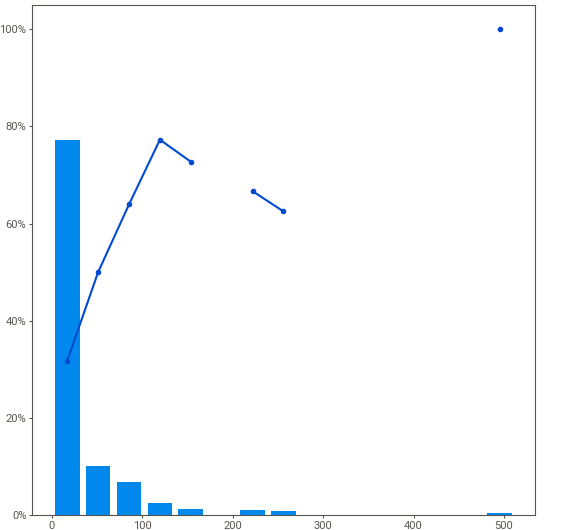
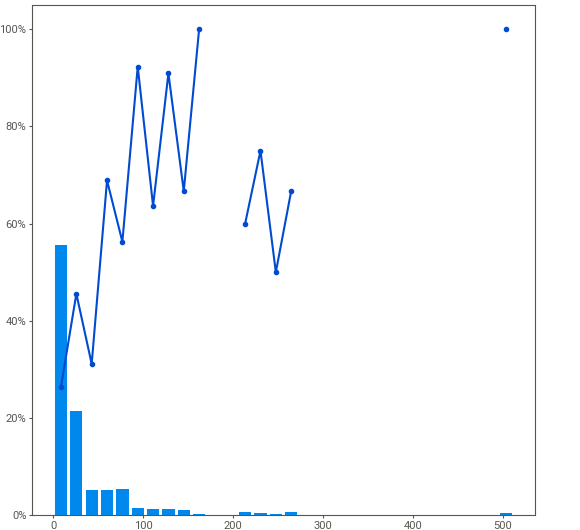
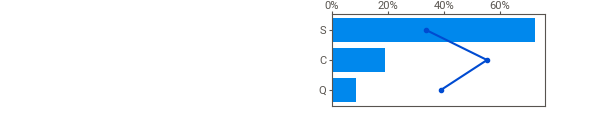
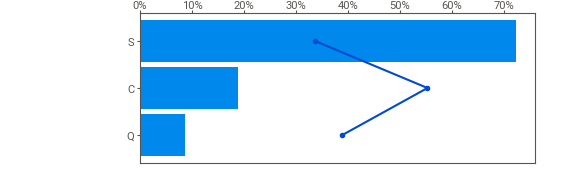
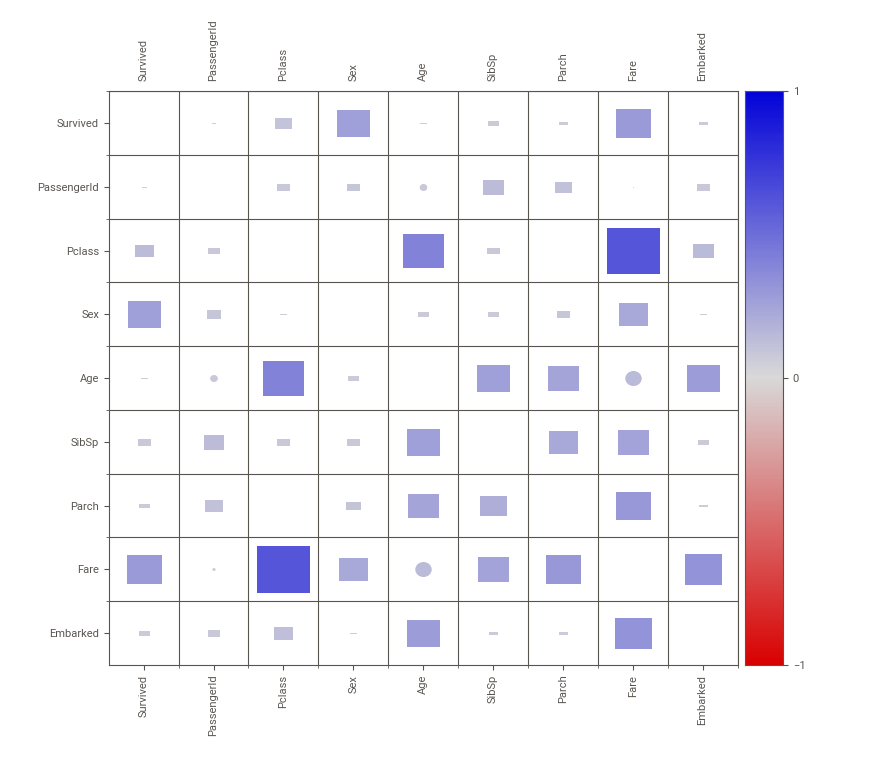
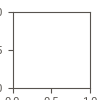

In [9]:
my_report.show_notebook()

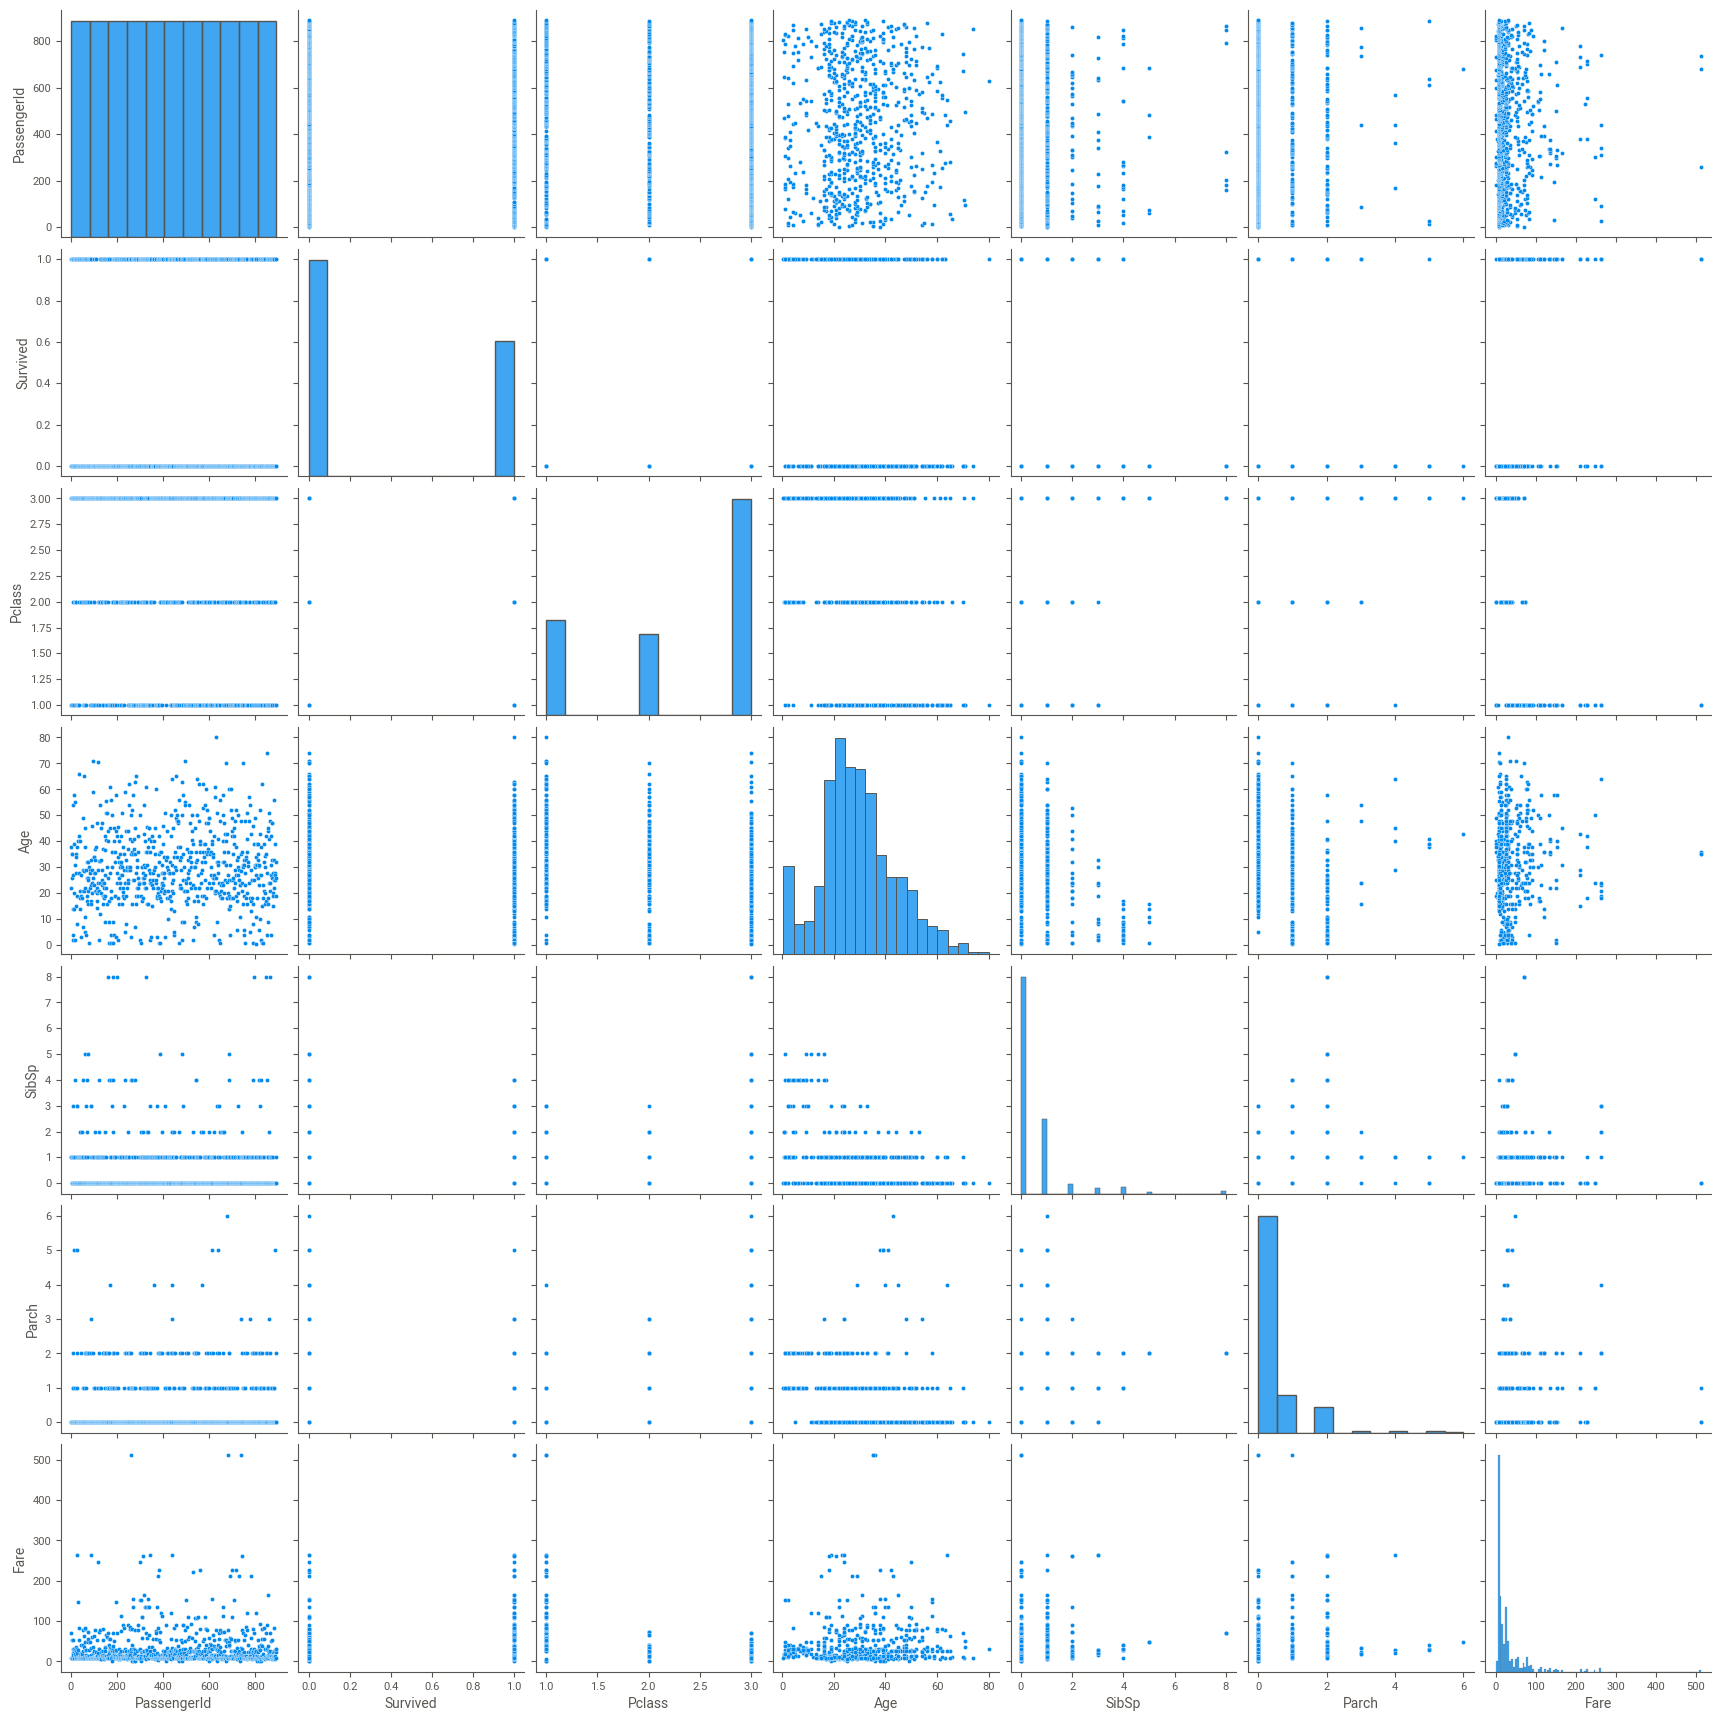

In [11]:
sns.pairplot(titanic_passengers)

In [26]:
y = titanic_passengers["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(titanic_passengers[features])
X_test = pd.get_dummies(titanic_passengers_test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)


In [27]:
model.score(X, y)

0.8159371492704826

In [29]:
output = pd.DataFrame({'PassengerId': titanic_passengers_test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)